# 📈 Week 1 Trading Strategy: Foundation-Based Analysis

---

## 🎯 Strategy Overview

**What We're Building:**
A foundation-based trading analysis system using only Week 1 concepts:
- NumPy for calculations
- Pandas for data manipulation
- Basic returns and volatility
- Correlation analysis
- Simple moving averages

**Strategy Logic:**
1. Calculate returns and volatility for multiple assets
2. Identify relative strength (momentum)
3. Analyze correlations for diversification
4. Simple MA crossover signals

**Tickers:** Dynamic - change the TICKERS list to analyze any stocks!

---

In [1]:
# ============================================================
# CONFIGURATION - CHANGE THESE TO ANALYZE DIFFERENT ASSETS
# ============================================================
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']  # Change these!
BENCHMARK = 'SPY'
LOOKBACK_DAYS = 252 * 3  # 3 years of data

# Strategy parameters
SHORT_MA = 20
LONG_MA = 50
RISK_FREE_RATE = 0.05  # 5% annual risk-free rate

print("=" * 60)
print("📊 WEEK 1 TRADING STRATEGY: FOUNDATION ANALYSIS")
print("=" * 60)
print(f"\n🎯 Analyzing: {TICKERS}")
print(f"📈 Benchmark: {BENCHMARK}")
print(f"📅 Lookback: {LOOKBACK_DAYS} trading days (~{LOOKBACK_DAYS//252} years)")

📊 WEEK 1 TRADING STRATEGY: FOUNDATION ANALYSIS

🎯 Analyzing: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
📈 Benchmark: SPY
📅 Lookback: 756 trading days (~3 years)


In [2]:
# ============================================================
# DATA LOADING - Using Pandas and yfinance
# ============================================================
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for professional charts
plt.style.use('seaborn-v0_8-whitegrid')

# Fetch data
all_tickers = TICKERS + [BENCHMARK]
end_date = datetime.now()
start_date = end_date - timedelta(days=int(LOOKBACK_DAYS * 1.5))  # Extra buffer

print("\n📥 Downloading market data...")
data = yf.download(all_tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)

# Extract prices
prices = data['Close'].dropna()
prices = prices.tail(LOOKBACK_DAYS)  # Exact lookback period

print(f"✅ Loaded {len(prices)} trading days")
print(f"📅 Period: {prices.index[0].strftime('%Y-%m-%d')} to {prices.index[-1].strftime('%Y-%m-%d')}")
print(f"\n📊 Latest Prices:")
print(prices.tail(3).round(2).to_string())


📥 Downloading market data...
✅ Loaded 756 trading days
📅 Period: 2023-01-18 to 2026-01-22

📊 Latest Prices:
Ticker        AAPL    AMZN   GOOGL    META    MSFT     SPY
Date                                                      
2026-01-20  246.70  231.00  322.00  604.12  454.52  677.58
2026-01-21  247.65  231.31  328.38  612.96  444.11  685.40
2026-01-22  249.61  234.39  331.15  637.73  446.92  689.23


---

## 📊 Section 1: Returns Analysis (Week 1 Concept)

**What we're calculating:**
- Daily simple returns
- Daily log returns  
- Cumulative returns
- Multi-period returns (weekly, monthly)

**Why this matters:**
Returns are the foundation of all financial analysis. They're stationary (unlike prices) and allow comparison across assets.

In [3]:
# ============================================================
# RETURNS CALCULATION
# ============================================================

# Simple returns
simple_returns = prices.pct_change().dropna()

# Log returns (for statistical analysis)
log_returns = np.log(prices / prices.shift(1)).dropna()

# Cumulative returns (normalized to start at 1)
cumulative_returns = (1 + simple_returns).cumprod()

# Multi-period returns
weekly_returns = prices.resample('W').last().pct_change().dropna()
monthly_returns = prices.resample('ME').last().pct_change().dropna()

print("📈 RETURNS SUMMARY")
print("=" * 70)
print(f"\n{'Ticker':<10} {'Total Return':>15} {'Avg Daily':>15} {'Avg Monthly':>15}")
print("-" * 70)

for ticker in TICKERS:
    total_ret = cumulative_returns[ticker].iloc[-1] - 1
    avg_daily = simple_returns[ticker].mean()
    avg_monthly = monthly_returns[ticker].mean()
    print(f"{ticker:<10} {total_ret:>14.2%} {avg_daily:>14.4%} {avg_monthly:>14.2%}")

# Add benchmark
total_ret = cumulative_returns[BENCHMARK].iloc[-1] - 1
avg_daily = simple_returns[BENCHMARK].mean()
avg_monthly = monthly_returns[BENCHMARK].mean()
print("-" * 70)
print(f"{BENCHMARK:<10} {total_ret:>14.2%} {avg_daily:>14.4%} {avg_monthly:>14.2%}")

📈 RETURNS SUMMARY

Ticker        Total Return       Avg Daily     Avg Monthly
----------------------------------------------------------------------
AAPL               87.39%        0.0960%          1.76%
MSFT               94.06%        0.0983%          1.90%
GOOGL             266.17%        0.1901%          3.72%
AMZN              145.54%        0.1389%          2.53%
META              382.77%        0.2366%          4.57%
----------------------------------------------------------------------
SPY                83.15%        0.0848%          1.64%


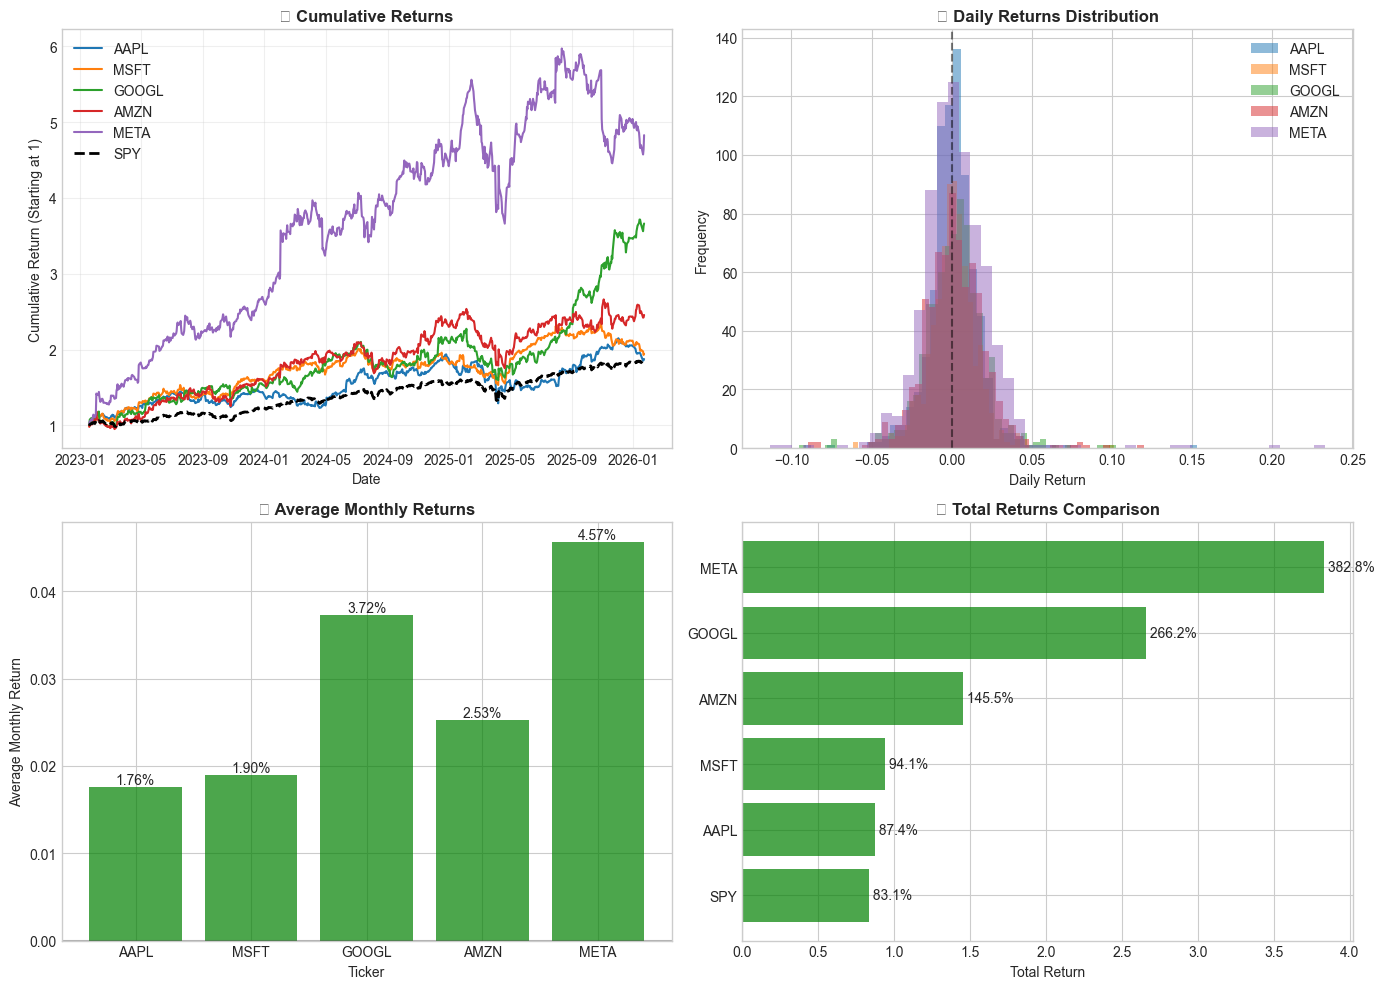

In [4]:
# ============================================================
# VISUALIZATION: Cumulative Returns
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Cumulative Returns
ax1 = axes[0, 0]
for ticker in TICKERS:
    ax1.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker, linewidth=1.5)
ax1.plot(cumulative_returns.index, cumulative_returns[BENCHMARK], 'k--', label=BENCHMARK, linewidth=2)
ax1.set_title('📈 Cumulative Returns', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Starting at 1)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Returns Distribution
ax2 = axes[0, 1]
for ticker in TICKERS:
    ax2.hist(simple_returns[ticker], bins=50, alpha=0.5, label=ticker)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
ax2.set_title('📊 Daily Returns Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Monthly Returns Bar Chart
ax3 = axes[1, 0]
monthly_avg = monthly_returns[TICKERS].mean()
colors = ['green' if x > 0 else 'red' for x in monthly_avg]
ax3.bar(monthly_avg.index, monthly_avg.values, color=colors, alpha=0.7)
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.set_title('📅 Average Monthly Returns', fontsize=12, fontweight='bold')
ax3.set_xlabel('Ticker')
ax3.set_ylabel('Average Monthly Return')
for i, v in enumerate(monthly_avg):
    ax3.text(i, v, f'{v:.2%}', ha='center', va='bottom' if v > 0 else 'top', fontsize=10)

# 4. Total Returns Comparison
ax4 = axes[1, 1]
total_returns = cumulative_returns.iloc[-1] - 1
total_returns_sorted = total_returns.sort_values(ascending=True)
colors = ['green' if x > 0 else 'red' for x in total_returns_sorted]
ax4.barh(total_returns_sorted.index, total_returns_sorted.values, color=colors, alpha=0.7)
ax4.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax4.set_title('🏆 Total Returns Comparison', fontsize=12, fontweight='bold')
ax4.set_xlabel('Total Return')
for i, v in enumerate(total_returns_sorted):
    ax4.text(v, i, f' {v:.1%}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

---

## 📊 Section 2: Volatility Analysis (Week 1 Concept)

**What we're calculating:**
- Daily volatility (standard deviation)
- Annualized volatility
- Rolling volatility (20-day)
- Risk-adjusted returns (Sharpe Ratio)

**Why this matters:**
Volatility measures risk. Higher volatility = more uncertainty in returns. The Sharpe Ratio tells us how much return we get per unit of risk.

In [5]:
# ============================================================
# VOLATILITY ANALYSIS
# ============================================================

# Daily volatility
daily_vol = simple_returns.std()

# Annualized volatility (multiply daily by sqrt(252))
annual_vol = daily_vol * np.sqrt(252)

# Rolling 20-day volatility
rolling_vol = simple_returns.rolling(20).std() * np.sqrt(252)

# Sharpe Ratio = (Return - Risk-Free Rate) / Volatility
annual_returns = (cumulative_returns.iloc[-1] ** (252/len(simple_returns))) - 1
sharpe_ratios = (annual_returns - RISK_FREE_RATE) / annual_vol

print("📊 VOLATILITY & RISK METRICS")
print("=" * 80)
print(f"\n{'Ticker':<10} {'Ann. Return':>15} {'Ann. Vol':>15} {'Sharpe Ratio':>15} {'Rating':>15}")
print("-" * 80)

for ticker in all_tickers:
    ann_ret = annual_returns[ticker]
    ann_vol_val = annual_vol[ticker]
    sharpe = sharpe_ratios[ticker]
    
    # Rating based on Sharpe
    if sharpe > 1.0:
        rating = "⭐⭐⭐ Excellent"
    elif sharpe > 0.5:
        rating = "⭐⭐ Good"
    elif sharpe > 0:
        rating = "⭐ Fair"
    else:
        rating = "❌ Poor"
    
    print(f"{ticker:<10} {ann_ret:>14.2%} {ann_vol_val:>14.2%} {sharpe:>15.2f} {rating:>15}")

📊 VOLATILITY & RISK METRICS

Ticker         Ann. Return        Ann. Vol    Sharpe Ratio          Rating
--------------------------------------------------------------------------------
AAPL               23.32%         25.54%            0.72         ⭐⭐ Good
MSFT               24.77%         23.00%            0.86         ⭐⭐ Good
GOOGL              54.22%         30.19%            1.63   ⭐⭐⭐ Excellent
AMZN               34.96%         31.72%            0.94         ⭐⭐ Good
META               69.13%         38.14%            1.68   ⭐⭐⭐ Excellent
SPY                22.38%         15.26%            1.14   ⭐⭐⭐ Excellent


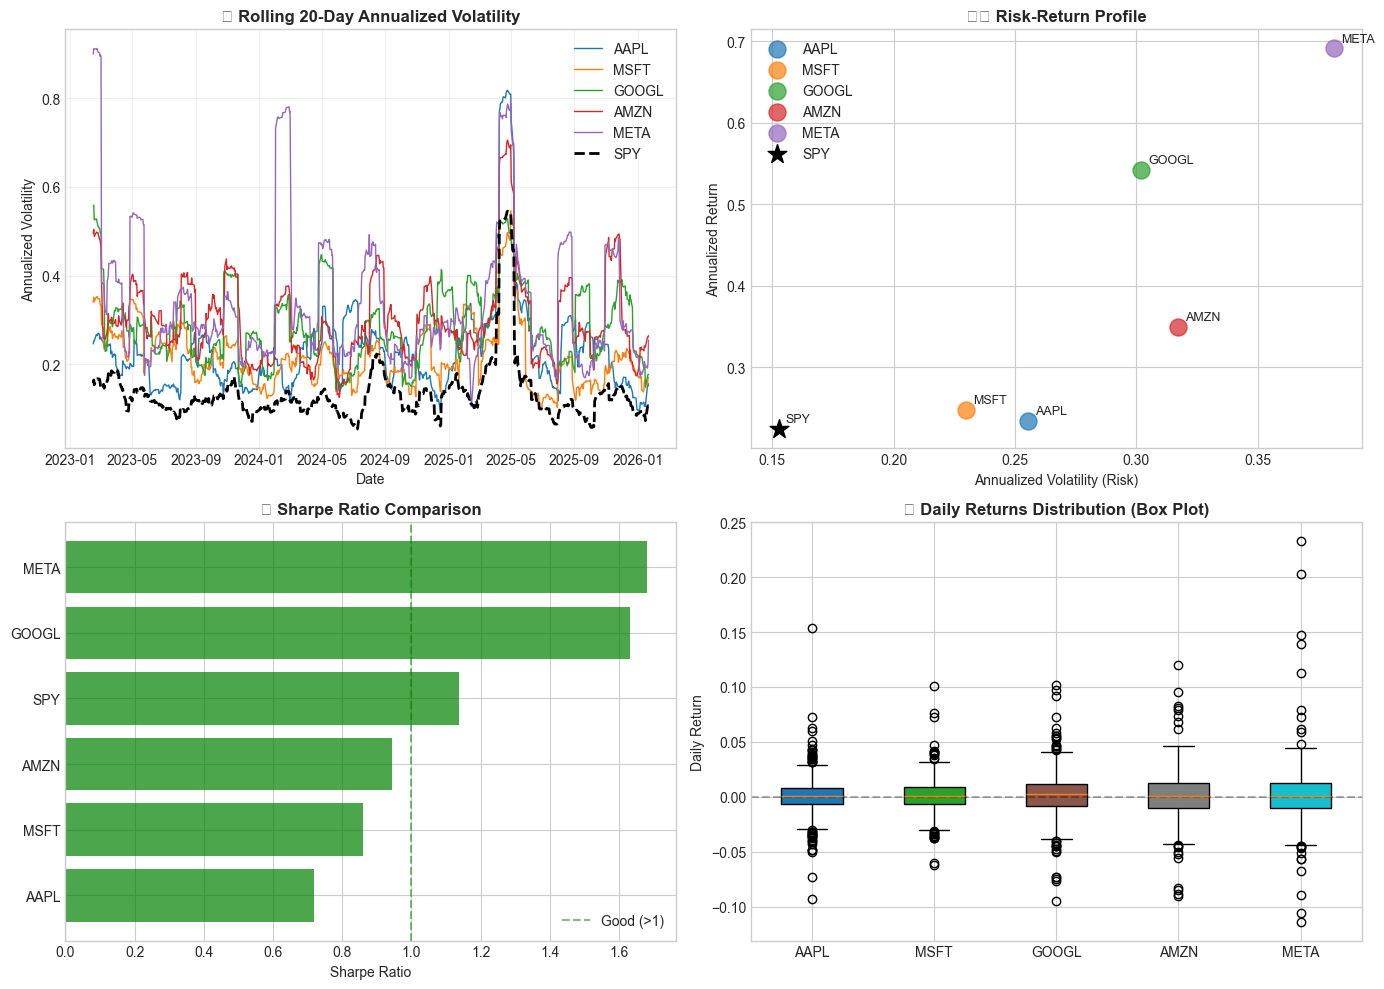

In [6]:
# ============================================================
# VISUALIZATION: Volatility Analysis
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Rolling Volatility Over Time
ax1 = axes[0, 0]
for ticker in TICKERS:
    ax1.plot(rolling_vol.index, rolling_vol[ticker], label=ticker, linewidth=1)
ax1.plot(rolling_vol.index, rolling_vol[BENCHMARK], 'k--', label=BENCHMARK, linewidth=2)
ax1.set_title('📈 Rolling 20-Day Annualized Volatility', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Annualized Volatility')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# 2. Risk-Return Scatter
ax2 = axes[0, 1]
for ticker in TICKERS:
    ax2.scatter(annual_vol[ticker], annual_returns[ticker], s=150, label=ticker, alpha=0.7)
ax2.scatter(annual_vol[BENCHMARK], annual_returns[BENCHMARK], s=200, c='black', marker='*', label=BENCHMARK)
ax2.set_title('⚖️ Risk-Return Profile', fontsize=12, fontweight='bold')
ax2.set_xlabel('Annualized Volatility (Risk)')
ax2.set_ylabel('Annualized Return')
ax2.legend()

# Add annotations
for ticker in all_tickers:
    ax2.annotate(ticker, (annual_vol[ticker], annual_returns[ticker]), 
                 textcoords="offset points", xytext=(5,5), fontsize=9)

# 3. Sharpe Ratio Comparison
ax3 = axes[1, 0]
sharpe_sorted = sharpe_ratios[all_tickers].sort_values(ascending=True)
colors = ['green' if x > 0 else 'red' for x in sharpe_sorted]
ax3.barh(sharpe_sorted.index, sharpe_sorted.values, color=colors, alpha=0.7)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.5)
ax3.axvline(x=1, color='g', linestyle='--', alpha=0.5, label='Good (>1)')
ax3.set_title('📊 Sharpe Ratio Comparison', fontsize=12, fontweight='bold')
ax3.set_xlabel('Sharpe Ratio')
ax3.legend()

# 4. Volatility Distribution
ax4 = axes[1, 1]
vol_data = [simple_returns[ticker].values for ticker in TICKERS]
bp = ax4.boxplot(vol_data, labels=TICKERS, patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.tab10(np.linspace(0, 1, len(TICKERS)))):
    patch.set_facecolor(color)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax4.set_title('📦 Daily Returns Distribution (Box Plot)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Daily Return')

plt.tight_layout()
plt.show()

---

## 📊 Section 3: Correlation Analysis (Week 1 Concept)

**What we're calculating:**
- Pairwise correlations between assets
- Rolling correlations (changes over time)
- Diversification potential

**Why this matters:**
Correlation tells us how assets move together. Low correlation = better diversification. In crises, correlations often spike (assets fall together).

In [7]:
# ============================================================
# CORRELATION ANALYSIS
# ============================================================

# Full period correlation matrix
corr_matrix = simple_returns[all_tickers].corr()

# Rolling 60-day correlation with benchmark
rolling_corr_with_spy = pd.DataFrame()
for ticker in TICKERS:
    rolling_corr_with_spy[ticker] = simple_returns[ticker].rolling(60).corr(simple_returns[BENCHMARK])

print("📊 CORRELATION MATRIX")
print("=" * 70)
print(corr_matrix.round(3).to_string())

# Average correlation (diversification measure)
# Get upper triangle (excluding diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
avg_correlation = upper_tri.stack().mean()

print(f"\n📈 Average Pairwise Correlation: {avg_correlation:.3f}")
if avg_correlation < 0.5:
    print("✅ Good diversification - assets have relatively low correlation")
elif avg_correlation < 0.7:
    print("⚠️ Moderate diversification - some correlation between assets")
else:
    print("❌ High correlation - limited diversification benefit")

📊 CORRELATION MATRIX
Ticker   AAPL   MSFT  GOOGL   AMZN   META    SPY
Ticker                                          
AAPL    1.000  0.488  0.460  0.458  0.418  0.689
MSFT    0.488  1.000  0.484  0.606  0.592  0.672
GOOGL   0.460  0.484  1.000  0.553  0.482  0.590
AMZN    0.458  0.606  0.553  1.000  0.615  0.685
META    0.418  0.592  0.482  0.615  1.000  0.610
SPY     0.689  0.672  0.590  0.685  0.610  1.000

📈 Average Pairwise Correlation: 0.560
⚠️ Moderate diversification - some correlation between assets


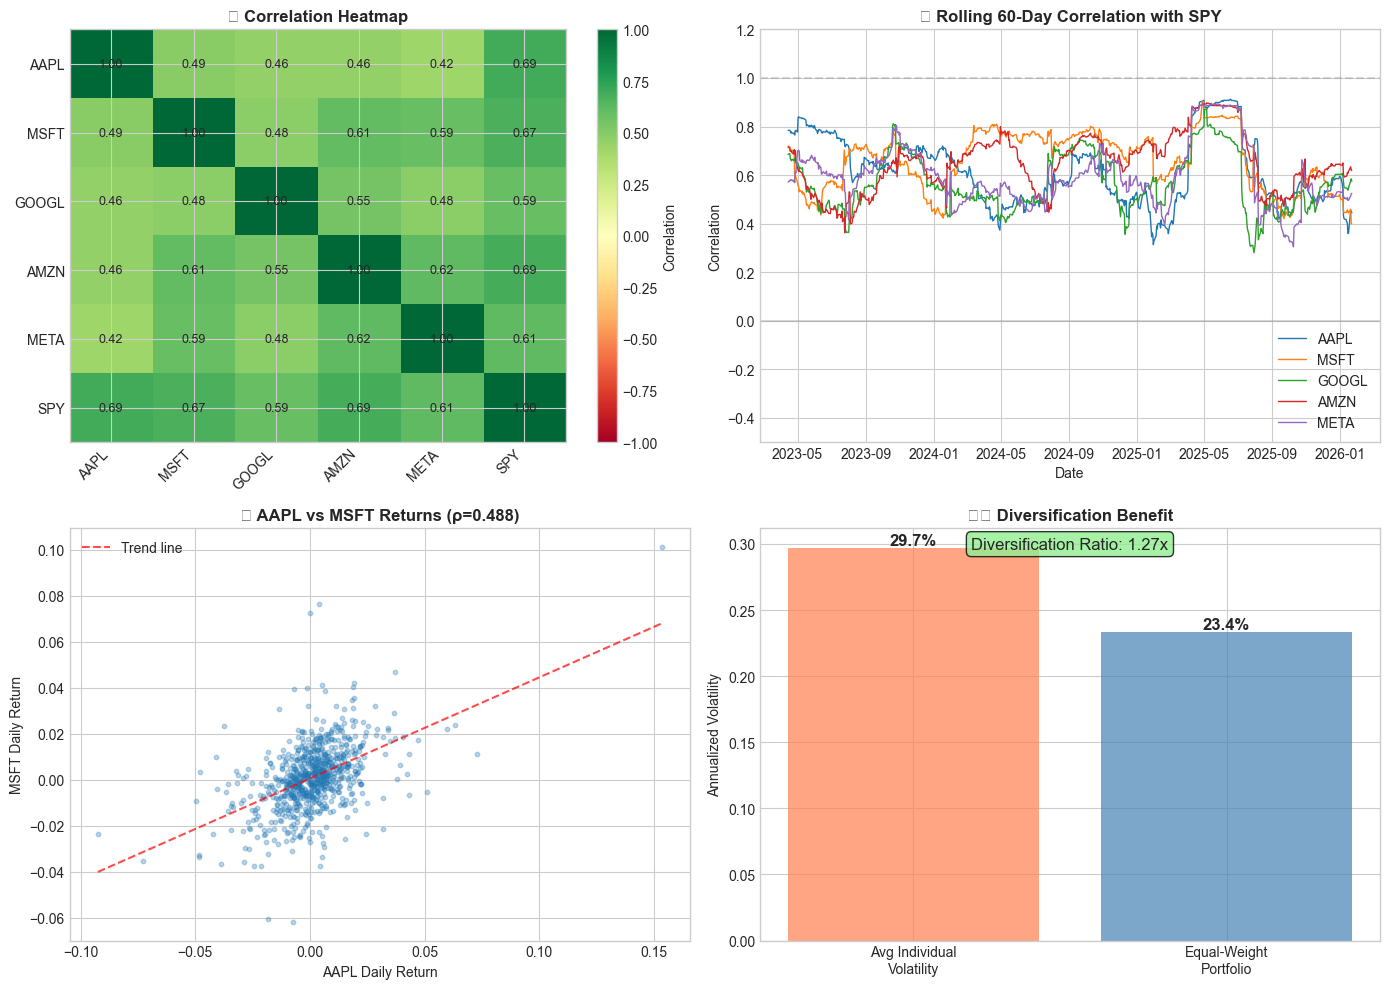


✅ Diversification Ratio: 1.27x
   This means equal-weight portfolio has 21.4% less volatility than average stock!


In [8]:
# ============================================================
# VISUALIZATION: Correlation Analysis
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Correlation Heatmap
ax1 = axes[0, 0]
im = ax1.imshow(corr_matrix, cmap='RdYlGn', vmin=-1, vmax=1, aspect='auto')
ax1.set_xticks(range(len(corr_matrix.columns)))
ax1.set_yticks(range(len(corr_matrix.columns)))
ax1.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax1.set_yticklabels(corr_matrix.columns)
ax1.set_title('🔥 Correlation Heatmap', fontsize=12, fontweight='bold')

# Add correlation values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        ax1.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', fontsize=9)

plt.colorbar(im, ax=ax1, label='Correlation')

# 2. Rolling Correlation with Benchmark
ax2 = axes[0, 1]
for ticker in TICKERS:
    ax2.plot(rolling_corr_with_spy.index, rolling_corr_with_spy[ticker], label=ticker, linewidth=1)
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.3)
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax2.set_title(f'📈 Rolling 60-Day Correlation with {BENCHMARK}', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Correlation')
ax2.legend(loc='lower right')
ax2.set_ylim(-0.5, 1.2)

# 3. Scatter Plot Matrix (simplified - top 2 stocks)
ax3 = axes[1, 0]
ticker1, ticker2 = TICKERS[0], TICKERS[1]
ax3.scatter(simple_returns[ticker1], simple_returns[ticker2], alpha=0.3, s=10)
ax3.set_xlabel(f'{ticker1} Daily Return')
ax3.set_ylabel(f'{ticker2} Daily Return')
ax3.set_title(f'🔗 {ticker1} vs {ticker2} Returns (ρ={corr_matrix.loc[ticker1, ticker2]:.3f})', 
              fontsize=12, fontweight='bold')

# Add regression line
z = np.polyfit(simple_returns[ticker1], simple_returns[ticker2], 1)
p = np.poly1d(z)
x_line = np.linspace(simple_returns[ticker1].min(), simple_returns[ticker1].max(), 100)
ax3.plot(x_line, p(x_line), 'r--', alpha=0.7, label=f'Trend line')
ax3.legend()

# 4. Diversification Benefit
ax4 = axes[1, 1]
# Calculate portfolio volatility with equal weights vs average individual vol
n_assets = len(TICKERS)
equal_weights = np.array([1/n_assets] * n_assets)

# Portfolio variance = w' * Cov * w
cov_matrix = simple_returns[TICKERS].cov()
portfolio_var = np.dot(equal_weights, np.dot(cov_matrix, equal_weights))
portfolio_vol = np.sqrt(portfolio_var) * np.sqrt(252)

# Average individual volatility
avg_individual_vol = annual_vol[TICKERS].mean()

# Diversification ratio
diversification_ratio = avg_individual_vol / portfolio_vol

bars = ax4.bar(['Avg Individual\nVolatility', 'Equal-Weight\nPortfolio'], 
               [avg_individual_vol, portfolio_vol], color=['coral', 'steelblue'], alpha=0.7)
ax4.set_ylabel('Annualized Volatility')
ax4.set_title('🛡️ Diversification Benefit', fontsize=12, fontweight='bold')

for bar, val in zip(bars, [avg_individual_vol, portfolio_vol]):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:.1%}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax4.text(0.5, 0.95, f'Diversification Ratio: {diversification_ratio:.2f}x', 
         transform=ax4.transAxes, ha='center', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n✅ Diversification Ratio: {diversification_ratio:.2f}x")
print(f"   This means equal-weight portfolio has {(1-1/diversification_ratio)*100:.1f}% less volatility than average stock!")

---

## 📊 Section 4: Simple Moving Average Strategy (Week 1 Concept)

**Strategy Logic:**
- **Buy Signal:** Short MA crosses above Long MA (bullish momentum)
- **Sell Signal:** Short MA crosses below Long MA (bearish momentum)

This is the simplest trend-following strategy using Week 1 concepts!

**Parameters:**
- Short MA: 20 days
- Long MA: 50 days

In [9]:
# ============================================================
# MOVING AVERAGE CROSSOVER STRATEGY
# ============================================================

def ma_crossover_signals(prices_series, short_window, long_window):
    """Generate MA crossover signals for a single asset."""
    short_ma = prices_series.rolling(window=short_window).mean()
    long_ma = prices_series.rolling(window=long_window).mean()
    
    signals = pd.DataFrame(index=prices_series.index)
    signals['price'] = prices_series
    signals['short_ma'] = short_ma
    signals['long_ma'] = long_ma
    
    # Signal: 1 when short > long, 0 otherwise
    signals['signal'] = 0
    signals.loc[short_ma > long_ma, 'signal'] = 1
    
    # Position changes (buy = 1, sell = -1, hold = 0)
    signals['position'] = signals['signal'].diff()
    
    return signals

# Generate signals for all tickers
all_signals = {}
for ticker in TICKERS:
    all_signals[ticker] = ma_crossover_signals(prices[ticker], SHORT_MA, LONG_MA)

print(f"📈 MA CROSSOVER STRATEGY ({SHORT_MA}/{LONG_MA})")
print("=" * 70)

# Summary
for ticker in TICKERS:
    signals = all_signals[ticker]
    buy_signals = (signals['position'] == 1).sum()
    sell_signals = (signals['position'] == -1).sum()
    current_position = signals['signal'].iloc[-1]
    
    pos_text = "📈 LONG" if current_position == 1 else "📉 OUT"
    print(f"{ticker}: Buy signals={buy_signals}, Sell signals={sell_signals}, Current: {pos_text}")

📈 MA CROSSOVER STRATEGY (20/50)
AAPL: Buy signals=8, Sell signals=8, Current: 📉 OUT
MSFT: Buy signals=7, Sell signals=7, Current: 📉 OUT
GOOGL: Buy signals=6, Sell signals=5, Current: 📈 LONG
AMZN: Buy signals=7, Sell signals=6, Current: 📈 LONG
META: Buy signals=7, Sell signals=6, Current: 📈 LONG


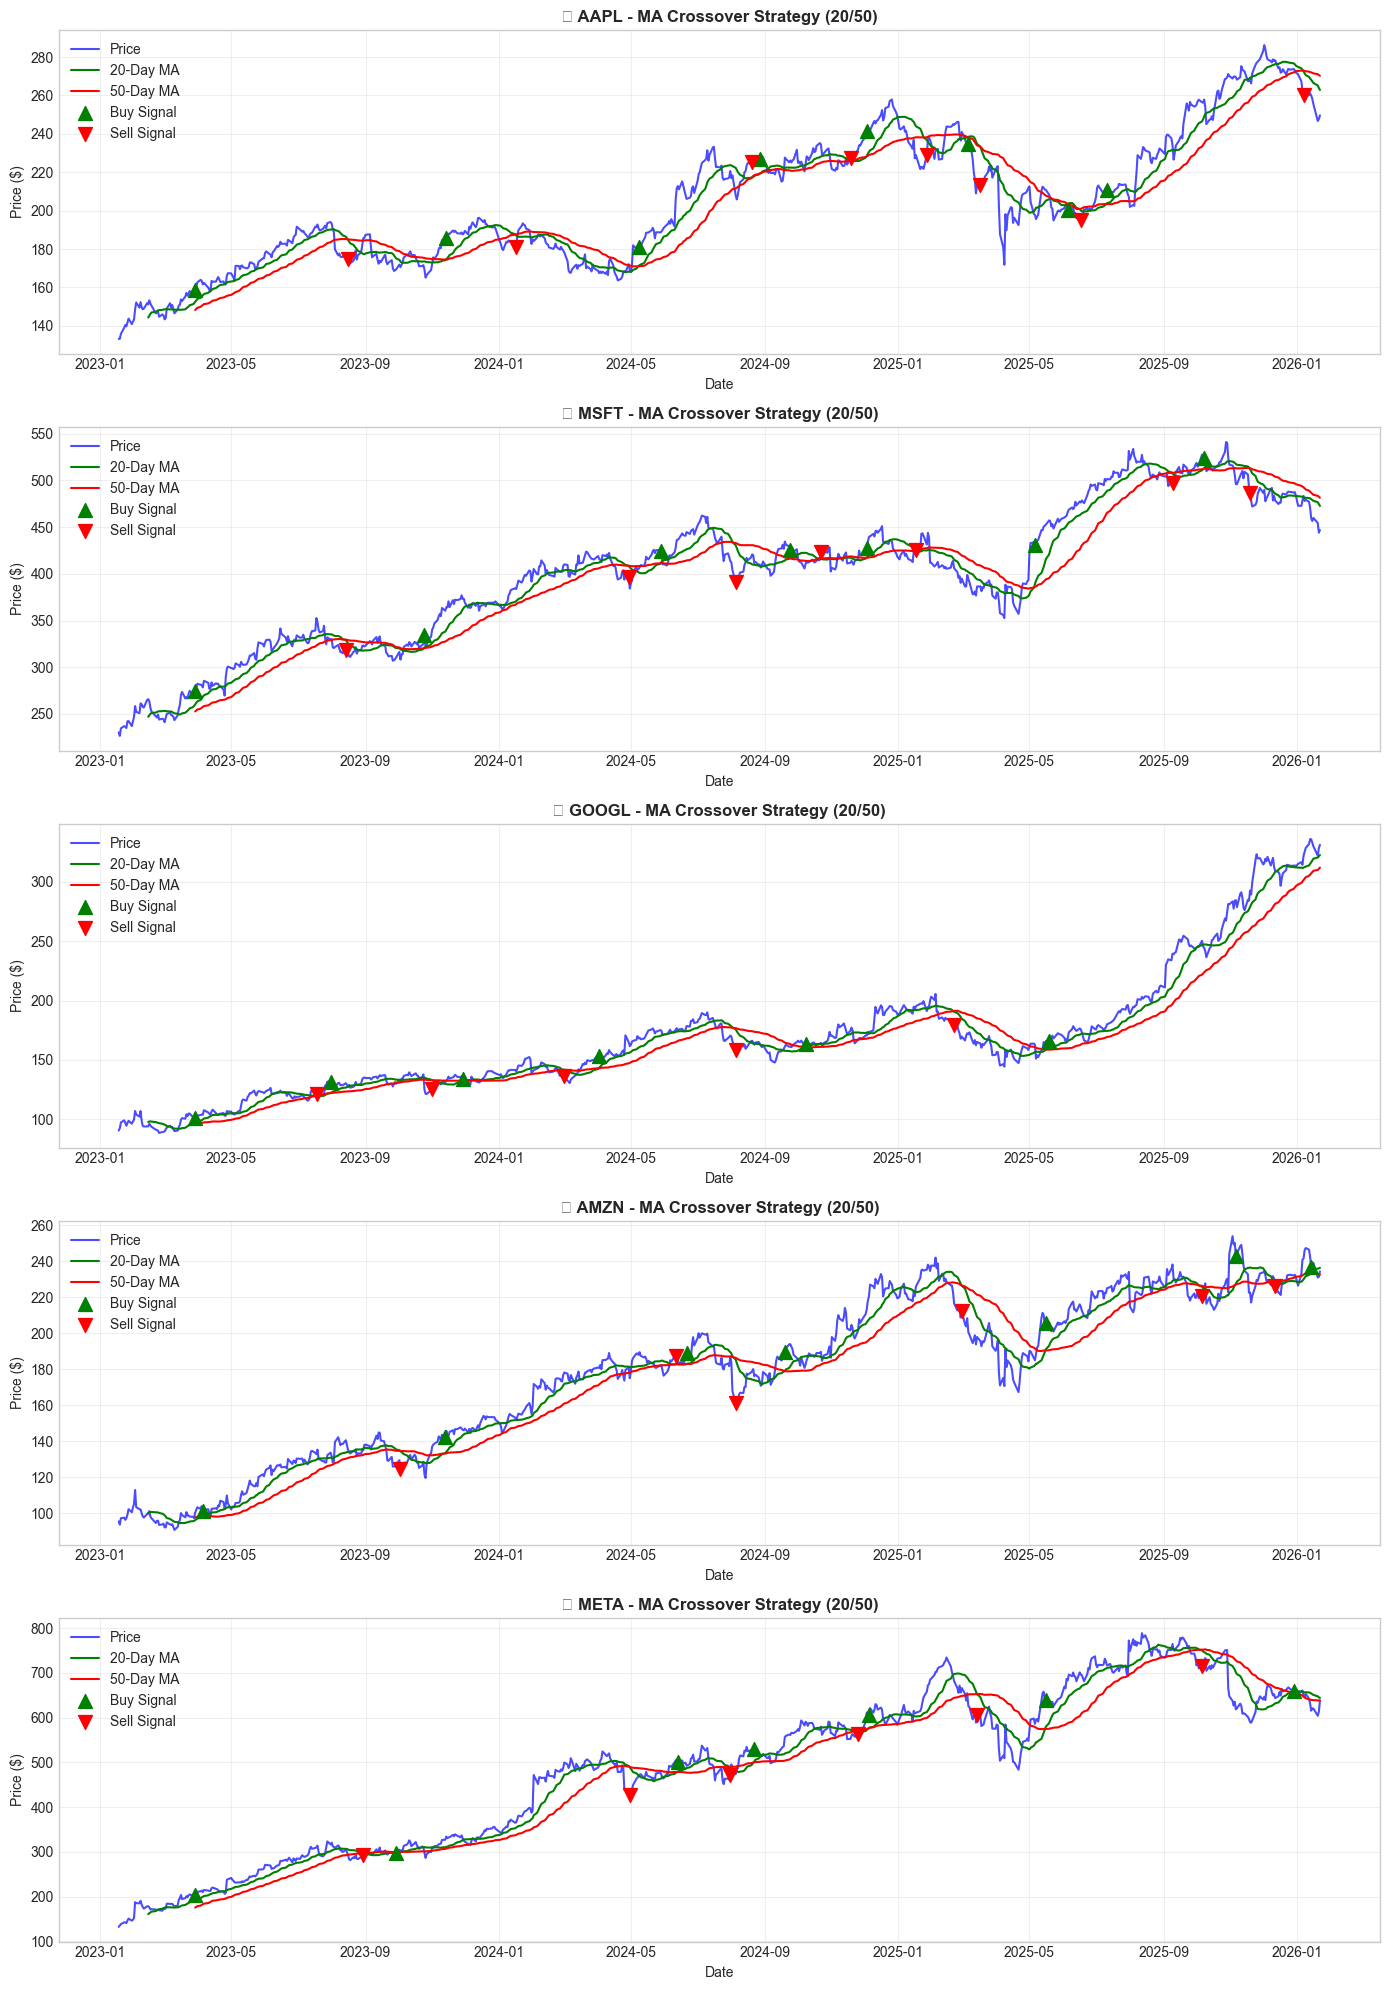

In [10]:
# ============================================================
# VISUALIZATION: MA Strategy for Each Stock
# ============================================================

n_tickers = len(TICKERS)
fig, axes = plt.subplots(n_tickers, 1, figsize=(14, 4*n_tickers))

if n_tickers == 1:
    axes = [axes]

for i, ticker in enumerate(TICKERS):
    ax = axes[i]
    signals = all_signals[ticker]
    
    # Plot price and MAs
    ax.plot(signals.index, signals['price'], 'b-', label='Price', alpha=0.7)
    ax.plot(signals.index, signals['short_ma'], 'g-', label=f'{SHORT_MA}-Day MA', linewidth=1.5)
    ax.plot(signals.index, signals['long_ma'], 'r-', label=f'{LONG_MA}-Day MA', linewidth=1.5)
    
    # Plot buy signals
    buy_dates = signals[signals['position'] == 1].index
    buy_prices = signals.loc[buy_dates, 'price']
    ax.scatter(buy_dates, buy_prices, marker='^', color='green', s=100, label='Buy Signal', zorder=5)
    
    # Plot sell signals
    sell_dates = signals[signals['position'] == -1].index
    sell_prices = signals.loc[sell_dates, 'price']
    ax.scatter(sell_dates, sell_prices, marker='v', color='red', s=100, label='Sell Signal', zorder=5)
    
    ax.set_title(f'📊 {ticker} - MA Crossover Strategy ({SHORT_MA}/{LONG_MA})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# ============================================================
# STRATEGY BACKTEST
# ============================================================

def backtest_ma_strategy(prices_series, signals, initial_capital=100000):
    """Backtest the MA crossover strategy."""
    
    # Daily returns
    returns = prices_series.pct_change()
    
    # Strategy returns (signal is lagged by 1 day - we trade next day)
    strategy_signal = signals['signal'].shift(1)  # Enter position next day
    strategy_returns = returns * strategy_signal
    
    # Cumulative returns
    buy_hold_cum = (1 + returns).cumprod()
    strategy_cum = (1 + strategy_returns).cumprod()
    
    # Portfolio value
    buy_hold_value = initial_capital * buy_hold_cum
    strategy_value = initial_capital * strategy_cum
    
    return {
        'buy_hold_value': buy_hold_value,
        'strategy_value': strategy_value,
        'buy_hold_return': buy_hold_cum.iloc[-1] - 1,
        'strategy_return': strategy_cum.iloc[-1] - 1,
        'strategy_returns': strategy_returns
    }

# Backtest all tickers
backtest_results = {}
for ticker in TICKERS:
    backtest_results[ticker] = backtest_ma_strategy(prices[ticker], all_signals[ticker])

# Summary
print("📊 STRATEGY BACKTEST RESULTS")
print("=" * 80)
print(f"\n{'Ticker':<10} {'Buy & Hold':>15} {'MA Strategy':>15} {'Outperform':>15} {'Verdict':>15}")
print("-" * 80)

for ticker in TICKERS:
    bh_ret = backtest_results[ticker]['buy_hold_return']
    strat_ret = backtest_results[ticker]['strategy_return']
    outperform = strat_ret - bh_ret
    
    verdict = "✅ WINNER" if outperform > 0 else "❌ LOSER"
    print(f"{ticker:<10} {bh_ret:>14.2%} {strat_ret:>14.2%} {outperform:>14.2%} {verdict:>15}")

📊 STRATEGY BACKTEST RESULTS

Ticker          Buy & Hold     MA Strategy      Outperform         Verdict
--------------------------------------------------------------------------------
AAPL               87.39%         38.72%        -48.68%         ❌ LOSER
MSFT               94.06%         34.15%        -59.90%         ❌ LOSER
GOOGL             266.17%        162.18%       -103.99%         ❌ LOSER
AMZN              145.54%         52.75%        -92.79%         ❌ LOSER
META              382.77%        123.85%       -258.92%         ❌ LOSER


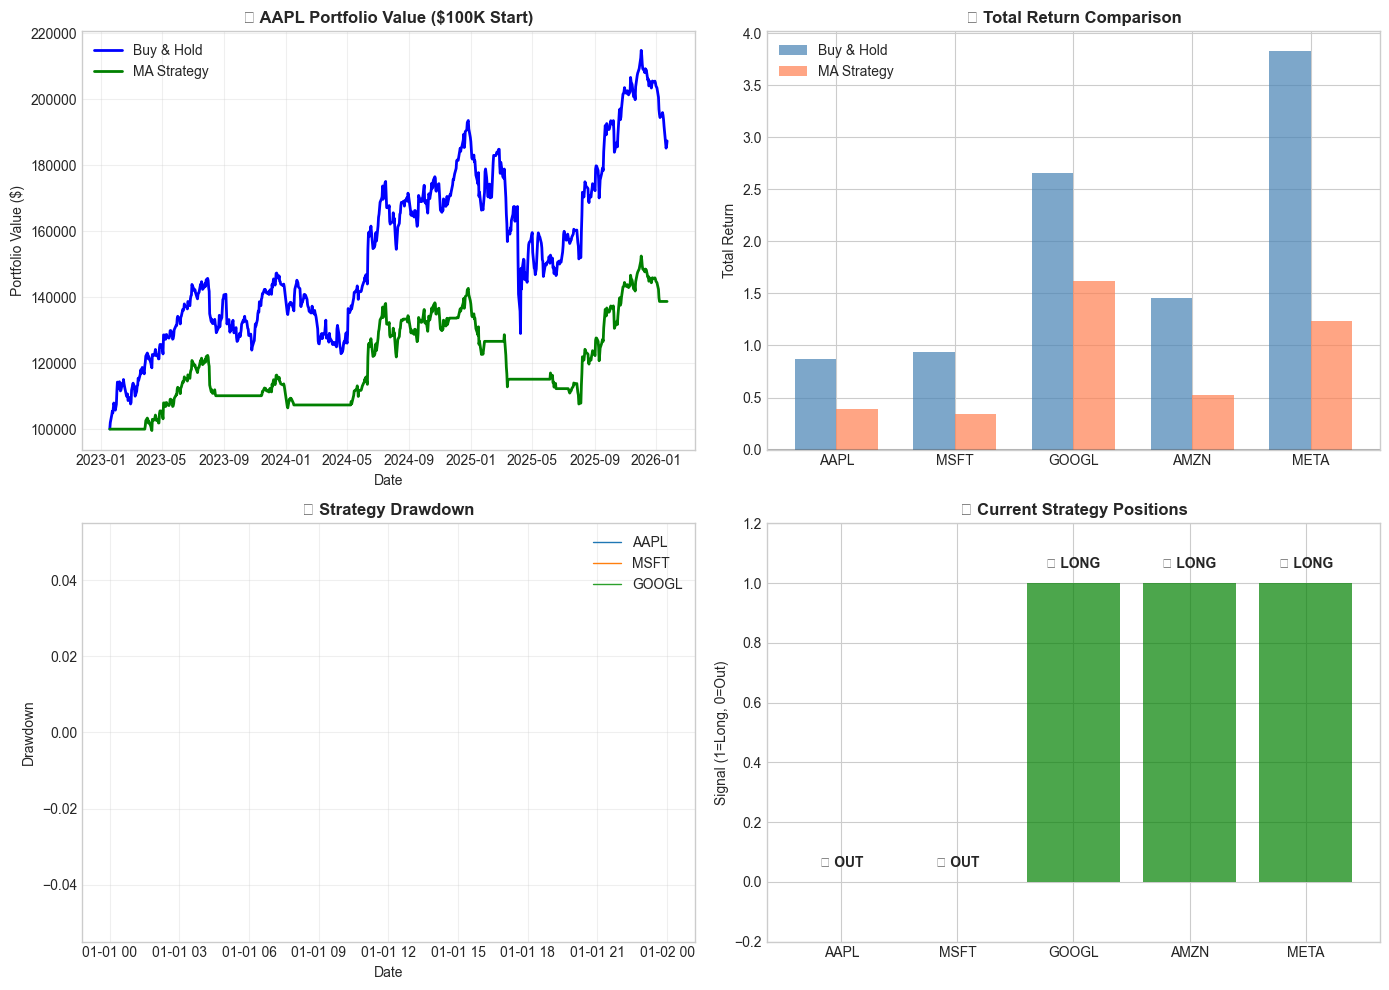

In [12]:
# ============================================================
# VISUALIZATION: Strategy Performance
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Portfolio Value Comparison (First Ticker)
ax1 = axes[0, 0]
ticker = TICKERS[0]
result = backtest_results[ticker]
ax1.plot(result['buy_hold_value'], 'b-', label='Buy & Hold', linewidth=2)
ax1.plot(result['strategy_value'], 'g-', label='MA Strategy', linewidth=2)
ax1.set_title(f'📈 {ticker} Portfolio Value ($100K Start)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Value ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Strategy Returns Comparison
ax2 = axes[0, 1]
x = np.arange(len(TICKERS))
width = 0.35
bh_returns = [backtest_results[t]['buy_hold_return'] for t in TICKERS]
strat_returns = [backtest_results[t]['strategy_return'] for t in TICKERS]

bars1 = ax2.bar(x - width/2, bh_returns, width, label='Buy & Hold', color='steelblue', alpha=0.7)
bars2 = ax2.bar(x + width/2, strat_returns, width, label='MA Strategy', color='coral', alpha=0.7)
ax2.set_xticks(x)
ax2.set_xticklabels(TICKERS)
ax2.set_title('📊 Total Return Comparison', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Return')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# 3. Strategy Drawdown
ax3 = axes[1, 0]
for ticker in TICKERS[:3]:  # Show first 3
    result = backtest_results[ticker]
    cum_returns = result['strategy_value'] / result['strategy_value'].iloc[0]
    rolling_max = cum_returns.cummax()
    drawdown = (cum_returns - rolling_max) / rolling_max
    ax3.plot(drawdown.index, drawdown.values, label=ticker, linewidth=1)

ax3.set_title('📉 Strategy Drawdown', fontsize=12, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Drawdown')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Current Signals Summary
ax4 = axes[1, 1]
current_signals = [all_signals[t]['signal'].iloc[-1] for t in TICKERS]
colors = ['green' if s == 1 else 'red' for s in current_signals]
bars = ax4.bar(TICKERS, current_signals, color=colors, alpha=0.7)
ax4.set_title('🚦 Current Strategy Positions', fontsize=12, fontweight='bold')
ax4.set_ylabel('Signal (1=Long, 0=Out)')
ax4.set_ylim(-0.2, 1.2)

for i, (ticker, signal) in enumerate(zip(TICKERS, current_signals)):
    label = "📈 LONG" if signal == 1 else "📉 OUT"
    ax4.text(i, signal + 0.05, label, ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

---

## 📊 Section 5: Final Analysis & Recommendations

Let's combine everything we've learned to make trading recommendations!

In [13]:
# ============================================================
# FINAL ANALYSIS & RECOMMENDATIONS
# ============================================================

print("=" * 80)
print("📊 WEEK 1 STRATEGY - FINAL ANALYSIS & RECOMMENDATIONS")
print("=" * 80)

# Create summary DataFrame
summary = pd.DataFrame(index=TICKERS)
summary['Total Return'] = [cumulative_returns[t].iloc[-1] - 1 for t in TICKERS]
summary['Annualized Vol'] = [annual_vol[t] for t in TICKERS]
summary['Sharpe Ratio'] = [sharpe_ratios[t] for t in TICKERS]
summary['Corr with SPY'] = [corr_matrix.loc[t, BENCHMARK] for t in TICKERS]
summary['MA Signal'] = ['LONG' if all_signals[t]['signal'].iloc[-1] == 1 else 'OUT' for t in TICKERS]
summary['Strategy Return'] = [backtest_results[t]['strategy_return'] for t in TICKERS]

# Rank stocks
summary['Sharpe Rank'] = summary['Sharpe Ratio'].rank(ascending=False)
summary['Return Rank'] = summary['Total Return'].rank(ascending=False)
summary['Combined Rank'] = (summary['Sharpe Rank'] + summary['Return Rank']) / 2

print("\n📋 COMPREHENSIVE STOCK ANALYSIS:")
print(summary.round(3).to_string())

# Top picks
print("\n" + "=" * 80)
print("🏆 TOP RECOMMENDATIONS:")
print("=" * 80)

top_pick = summary['Combined Rank'].idxmin()
print(f"\n1. 🥇 BEST OVERALL: {top_pick}")
print(f"   - Total Return: {summary.loc[top_pick, 'Total Return']:.2%}")
print(f"   - Sharpe Ratio: {summary.loc[top_pick, 'Sharpe Ratio']:.2f}")
print(f"   - Current Signal: {summary.loc[top_pick, 'MA Signal']}")

# Lowest volatility
lowest_vol = summary['Annualized Vol'].idxmin()
print(f"\n2. 🛡️ LOWEST RISK: {lowest_vol}")
print(f"   - Annualized Volatility: {summary.loc[lowest_vol, 'Annualized Vol']:.2%}")

# Best Sharpe
best_sharpe = summary['Sharpe Ratio'].idxmax()
print(f"\n3. ⭐ BEST RISK-ADJUSTED: {best_sharpe}")
print(f"   - Sharpe Ratio: {summary.loc[best_sharpe, 'Sharpe Ratio']:.2f}")

# Current longs
longs = summary[summary['MA Signal'] == 'LONG'].index.tolist()
print(f"\n4. 📈 CURRENT LONGS ({len(longs)} stocks): {', '.join(longs) if longs else 'None'}")

print("\n" + "=" * 80)
print("⚠️ DISCLAIMER: This is for educational purposes only. Not financial advice!")
print("=" * 80)

📊 WEEK 1 STRATEGY - FINAL ANALYSIS & RECOMMENDATIONS

📋 COMPREHENSIVE STOCK ANALYSIS:
       Total Return  Annualized Vol  Sharpe Ratio  Corr with SPY MA Signal  Strategy Return  Sharpe Rank  Return Rank  Combined Rank
AAPL          0.874           0.255         0.717          0.689       OUT            0.387          5.0          5.0            5.0
MSFT          0.941           0.230         0.859          0.672       OUT            0.342          4.0          4.0            4.0
GOOGL         2.662           0.302         1.630          0.590      LONG            1.622          2.0          2.0            2.0
AMZN          1.455           0.317         0.944          0.685      LONG            0.527          3.0          3.0            3.0
META          3.828           0.381         1.681          0.610      LONG            1.239          1.0          1.0            1.0

🏆 TOP RECOMMENDATIONS:

1. 🥇 BEST OVERALL: META
   - Total Return: 382.77%
   - Sharpe Ratio: 1.68
   - Current Sig

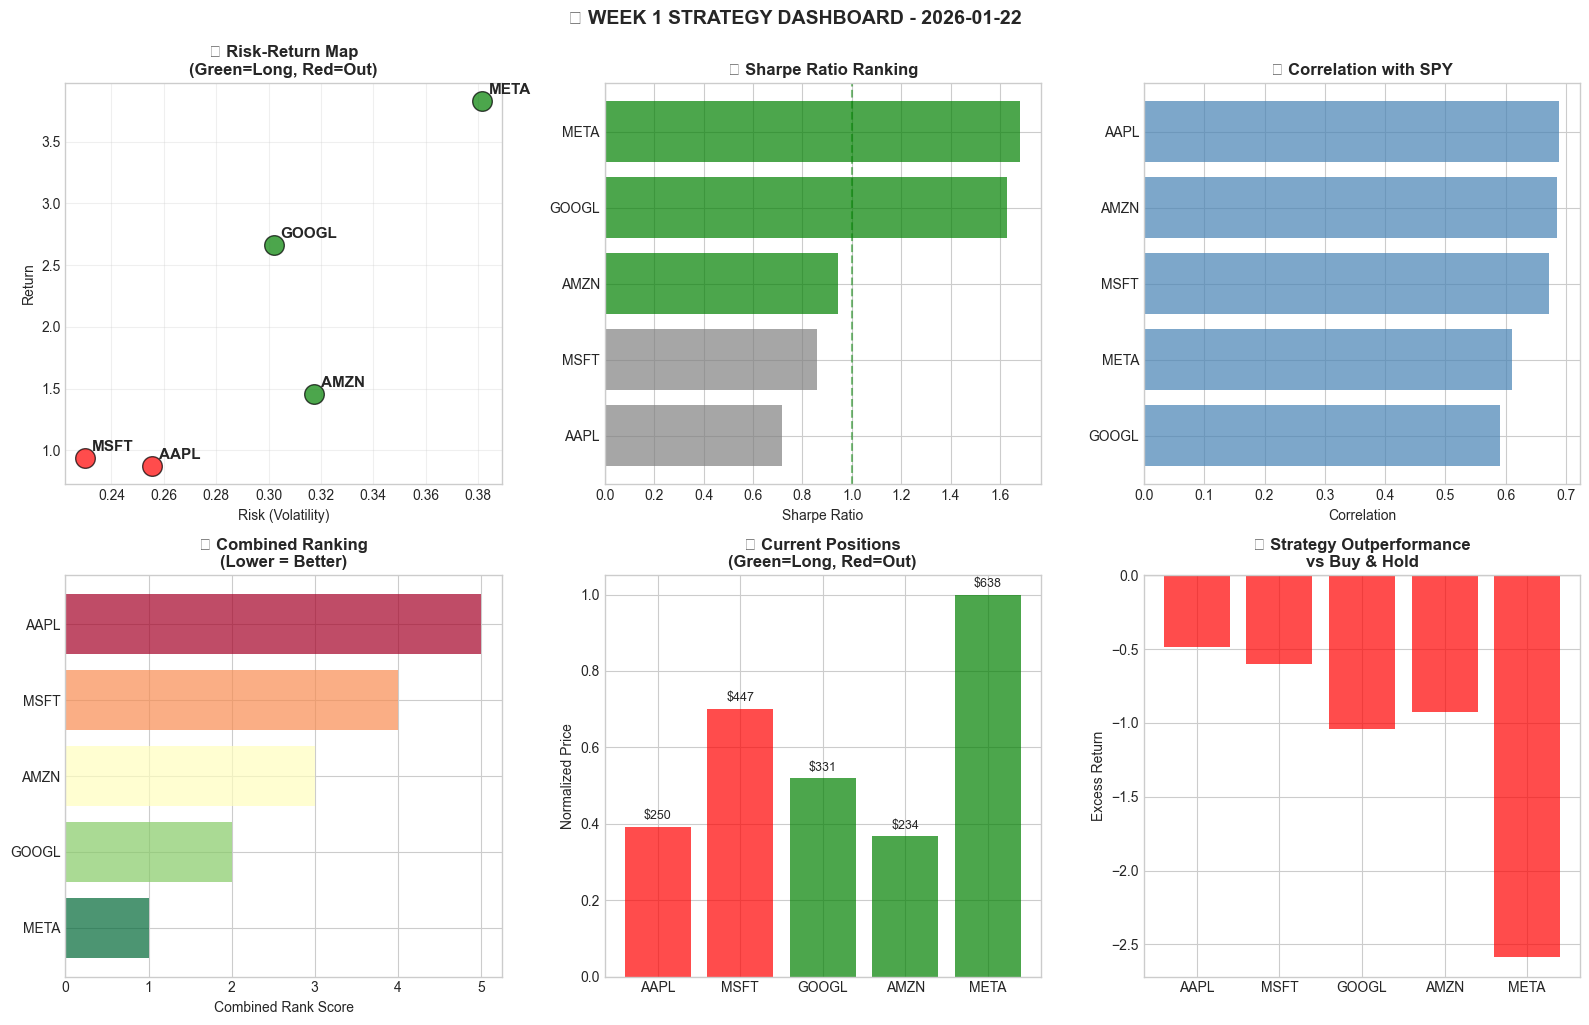


✅ Analysis Complete! Change TICKERS at the top to analyze different stocks.


In [14]:
# ============================================================
# FINAL VISUALIZATION: Stock Scorecard
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Return vs Risk Scatter with annotations
ax1 = axes[0, 0]
for ticker in TICKERS:
    color = 'green' if summary.loc[ticker, 'MA Signal'] == 'LONG' else 'red'
    ax1.scatter(summary.loc[ticker, 'Annualized Vol'], 
                summary.loc[ticker, 'Total Return'], 
                s=200, c=color, alpha=0.7, edgecolors='black')
    ax1.annotate(ticker, 
                 (summary.loc[ticker, 'Annualized Vol'], summary.loc[ticker, 'Total Return']),
                 textcoords="offset points", xytext=(5, 5), fontsize=11, fontweight='bold')
ax1.set_xlabel('Risk (Volatility)')
ax1.set_ylabel('Return')
ax1.set_title('📊 Risk-Return Map\n(Green=Long, Red=Out)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Sharpe Ratio Ranking
ax2 = axes[0, 1]
sharpe_sorted = summary['Sharpe Ratio'].sort_values()
colors = ['green' if summary.loc[t, 'MA Signal'] == 'LONG' else 'gray' for t in sharpe_sorted.index]
ax2.barh(sharpe_sorted.index, sharpe_sorted.values, color=colors, alpha=0.7)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=1, color='g', linestyle='--', alpha=0.5, label='Good (>1)')
ax2.set_title('📊 Sharpe Ratio Ranking', fontsize=12, fontweight='bold')
ax2.set_xlabel('Sharpe Ratio')

# 3. Correlation with SPY
ax3 = axes[0, 2]
corr_sorted = summary['Corr with SPY'].sort_values()
ax3.barh(corr_sorted.index, corr_sorted.values, color='steelblue', alpha=0.7)
ax3.set_title(f'🔗 Correlation with {BENCHMARK}', fontsize=12, fontweight='bold')
ax3.set_xlabel('Correlation')

# 4. Combined Rank
ax4 = axes[1, 0]
rank_sorted = summary['Combined Rank'].sort_values()
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(TICKERS)))
ax4.barh(rank_sorted.index, rank_sorted.values, color=colors, alpha=0.7)
ax4.set_title('🏆 Combined Ranking\n(Lower = Better)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Combined Rank Score')

# 5. Current Positions with price info
ax5 = axes[1, 1]
current_prices = prices[TICKERS].iloc[-1]
normalized_prices = current_prices / current_prices.max()
signal_colors = ['green' if summary.loc[t, 'MA Signal'] == 'LONG' else 'red' for t in TICKERS]
bars = ax5.bar(TICKERS, normalized_prices, color=signal_colors, alpha=0.7)
ax5.set_title('📈 Current Positions\n(Green=Long, Red=Out)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Normalized Price')
for i, (ticker, price) in enumerate(zip(TICKERS, current_prices)):
    ax5.text(i, normalized_prices.iloc[i] + 0.02, f'${price:.0f}', ha='center', fontsize=9)

# 6. Strategy vs Buy&Hold
ax6 = axes[1, 2]
strategy_diff = [backtest_results[t]['strategy_return'] - backtest_results[t]['buy_hold_return'] for t in TICKERS]
colors = ['green' if d > 0 else 'red' for d in strategy_diff]
ax6.bar(TICKERS, strategy_diff, color=colors, alpha=0.7)
ax6.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax6.set_title('📊 Strategy Outperformance\nvs Buy & Hold', fontsize=12, fontweight='bold')
ax6.set_ylabel('Excess Return')

plt.tight_layout()
plt.suptitle(f'🎯 WEEK 1 STRATEGY DASHBOARD - {datetime.now().strftime("%Y-%m-%d")}', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\n✅ Analysis Complete! Change TICKERS at the top to analyze different stocks.")

---

## 📚 Key Concepts Used (Week 1 Foundation)

| Concept | How We Used It |
|---------|----------------|
| **NumPy Arrays** | Vectorized return calculations |
| **Pandas DataFrames** | Time-series data management |
| **Simple Returns** | Performance measurement |
| **Log Returns** | Statistical analysis |
| **Volatility (Std Dev)** | Risk measurement |
| **Correlation** | Diversification analysis |
| **Moving Averages** | Trend identification |

---

## 🚀 Next Steps (Week 2+)

In upcoming weeks, we'll enhance this strategy with:
- Statistical hypothesis testing (Week 2)
- Time series analysis (Week 3)
- Machine learning models (Week 4+)
- Portfolio optimization (Week 5)
- And much more!

---

## ⚠️ Important Disclaimers

1. **Past performance does not guarantee future results**
2. **This is for educational purposes only**
3. **Always do your own research before investing**
4. **Consider transaction costs and taxes in real trading**

---